In [9]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [10]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
train_images[0,23,23]

194

In [13]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

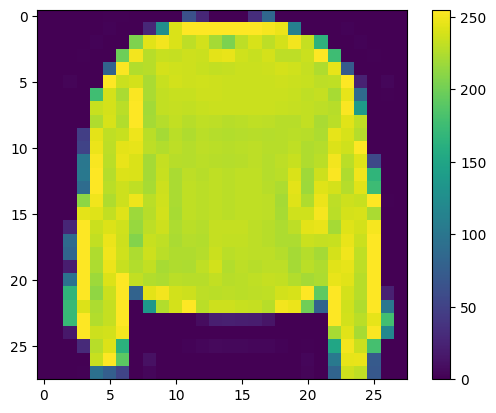

In [16]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

c:\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=15)  # we pass the data, labels and epochs and watch the magic!


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.9170 - loss: 0.2275
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.9170 - loss: 0.2202
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.9181 - loss: 0.2183
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.9225 - loss: 0.2087
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 927us/step - accuracy: 0.9243 - loss: 0.2000
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.9261 - loss: 0.1957
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.9275 - loss: 0.1928
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.9308 - loss: 0.1858
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.9331 - loss: 0.1806
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step - accuracy: 0.9344 - loss: 0.1757
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.9375 - loss: 0.1687
Epoch 12

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.8871 - loss: 0.3839
Test accuracy: 0.8863999843597412


In [24]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step


9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


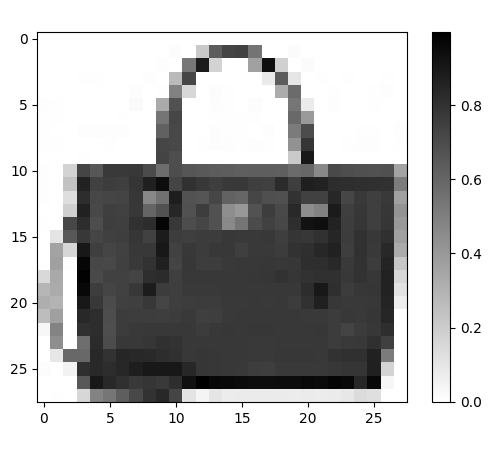

8


In [28]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)